In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove useless features

In [3]:
titanic_data_update = titanic_data.drop(["PassengerId", "Name", "Ticket"], axis=1)
titanic_data_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Review of data

In [4]:
print(f"Shape of dataset: {len(titanic_data_update)} rows x {len(titanic_data_update.columns)} columns")

Shape of dataset: 891 rows x 9 columns


In [5]:
print("Missing values in dataset: ")
print(titanic_data_update.isnull().sum())

Missing values in dataset: 
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


/tmp/ipykernel_28/1305224952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_data_update.corr()


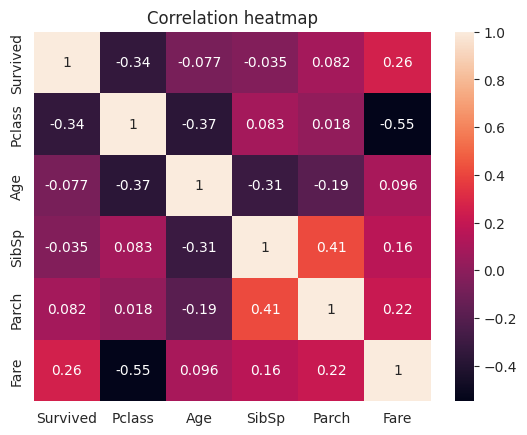

In [6]:
corr = titanic_data_update.corr()
plt.title("Correlation heatmap")
_ = sns.heatmap(corr, cmap="rocket", annot=True)

As we see the most correlated feature to Survived is Fare.

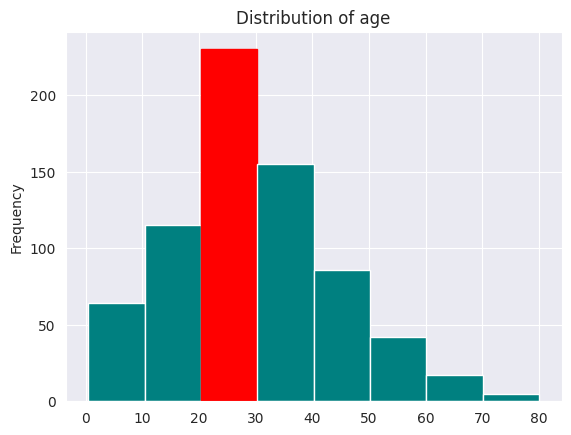

In [7]:
plt.title("Distribution of age")
s = titanic_data_update["Age"]
p = s.plot(kind='hist', bins=8, color='teal')
p.patches[2].set_color('red')

Majority of passengers age is between 10 and 50.

In [8]:
print(f"The oldest person was {np.max(titanic_data_update['Age'])}")

The oldest person was 80.0


In [9]:
print(f"The youngest person was {np.min(titanic_data_update['Age'])}")

The youngest person was 0.42


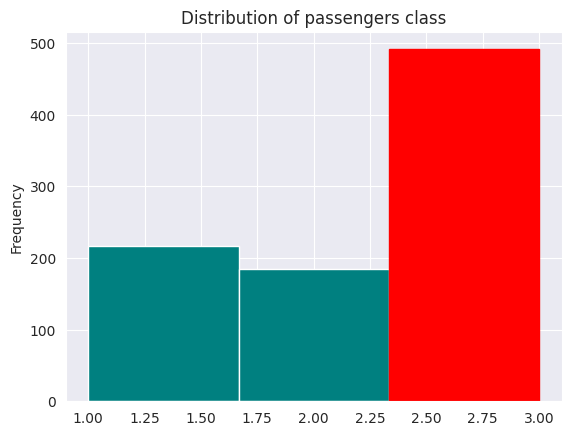

In [10]:
plt.title("Distribution of passengers class")
s = titanic_data_update["Pclass"]
p = s.plot(kind='hist', bins=3, color='teal')
p.patches[2].set_color('red')

The most of passengers was in third class.

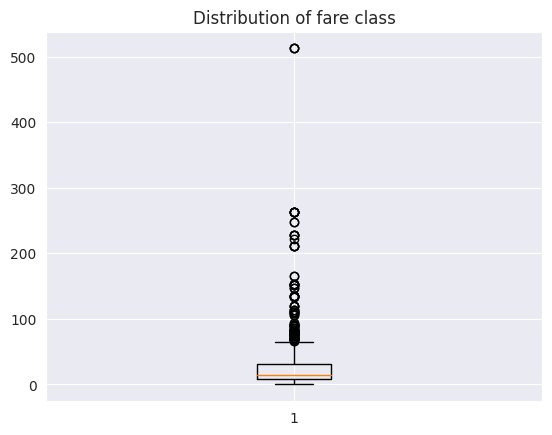

In [11]:
plt.title("Distribution of fare class")
plt.boxplot(titanic_data_update['Fare'])
plt.show()

We have a many outliers in our dataset in class fare.

## Preparing data before training

### Remove missing values in age

In [12]:
print(f"Missing values in Age: {titanic_data_update['Age'].isnull().sum()}")

Missing values in Age: 177


In [13]:
titanic_data_update["Age"].fillna(np.mean(titanic_data_update["Age"]), inplace=True)

In [14]:
print(f"Missing values in Age: {titanic_data_update['Age'].isnull().sum()}")

Missing values in Age: 0


We have filled in the missing values with the average

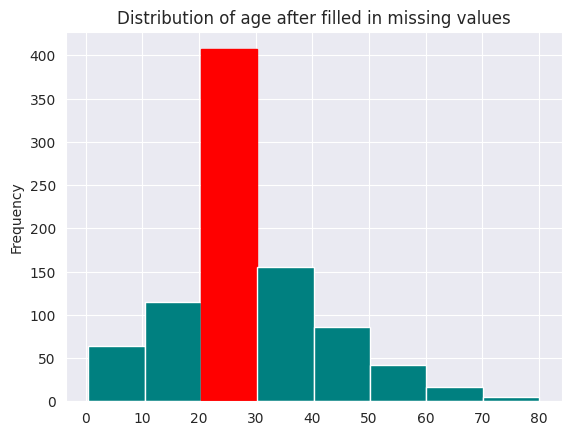

In [15]:
plt.title("Distribution of age after filled in missing values")
s = titanic_data_update["Age"]
p = s.plot(kind='hist', bins=8, color='teal')
p.patches[2].set_color('red')

### Remove missing values in cabin

In [16]:
print(f"Missing values in Cabin: {titanic_data_update['Cabin'].isnull().sum()}")

Missing values in Cabin: 687


In [17]:
print(f"Missing values in Cabin: {round(titanic_data_update['Cabin'].isnull().sum()/ len(titanic_data_update['Cabin']),2) * 100}%")

Missing values in Cabin: 77.0%


In this feature a 77% values is missing. To fill in missing values we should create a new class.

In [18]:
print(f"Type of cabins: {titanic_data_update['Cabin'].unique()}")

Type of cabins: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [19]:
titanic_data_update["Cabin"].fillna("M", inplace=True)

In [20]:
print(f"Missing values in Cabin: {titanic_data_update['Cabin'].isnull().sum()}")

Missing values in Cabin: 0


### Remove missing values in Embarked

In [21]:
print(f"Missing values in Embarked: {titanic_data_update['Embarked'].isnull().sum()}")

Missing values in Embarked: 2


In [22]:
from collections import Counter

count = Counter(titanic_data_update['Embarked'])
print(count)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [23]:
titanic_data_update["Embarked"].fillna("S", inplace=True)

In [24]:
print(f"Missing values in Embarked: {titanic_data_update['Embarked'].isnull().sum()}")

Missing values in Embarked: 0


In [25]:
print("Missing values in dataset: ")
print(titanic_data_update.isnull().sum())

Missing values in dataset: 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


As we see all of missing values we filled in.

### Add a new features

We have a similar feature SibSp and Parch. We want to simplify our features and reduce their amount. When we did a correlation between features, we see that SibSp and Parch are strongly correlated.

In [26]:
titanic_data_update["Family_size"] = titanic_data_update["SibSp"] + titanic_data_update["Parch"]

In [27]:
titanic_data_update

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size
0,0,3,male,22.000000,1,0,7.2500,M,S,1
1,1,1,female,38.000000,1,0,71.2833,C85,C,1
2,1,3,female,26.000000,0,0,7.9250,M,S,0
3,1,1,female,35.000000,1,0,53.1000,C123,S,1
4,0,3,male,35.000000,0,0,8.0500,M,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,M,S,0
887,1,1,female,19.000000,0,0,30.0000,B42,S,0
888,0,3,female,29.699118,1,2,23.4500,M,S,3
889,1,1,male,26.000000,0,0,30.0000,C148,C,0


Removing unnecessary features.

In [28]:
titanic_data_update.drop(["SibSp", "Parch"], inplace=True, axis=1)
titanic_data_update

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,0,3,male,22.000000,7.2500,M,S,1
1,1,1,female,38.000000,71.2833,C85,C,1
2,1,3,female,26.000000,7.9250,M,S,0
3,1,1,female,35.000000,53.1000,C123,S,1
4,0,3,male,35.000000,8.0500,M,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,M,S,0
887,1,1,female,19.000000,30.0000,B42,S,0
888,0,3,female,29.699118,23.4500,M,S,3
889,1,1,male,26.000000,30.0000,C148,C,0


### Change a fare to three classes

In [29]:
q1 = np.quantile(titanic_data_update["Fare"], q=0.25)
q3 = np.quantile(titanic_data_update["Fare"], q=0.75)
titanic_data_update["Fare"] = [0 if fare < q1 else 1 if fare < q3 else 2 for fare in titanic_data_update["Fare"]]
titanic_data_update

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,0,3,male,22.000000,0,M,S,1
1,1,1,female,38.000000,2,C85,C,1
2,1,3,female,26.000000,1,M,S,0
3,1,1,female,35.000000,2,C123,S,1
4,0,3,male,35.000000,1,M,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,1,M,S,0
887,1,1,female,19.000000,1,B42,S,0
888,0,3,female,29.699118,1,M,S,3
889,1,1,male,26.000000,1,C148,C,0


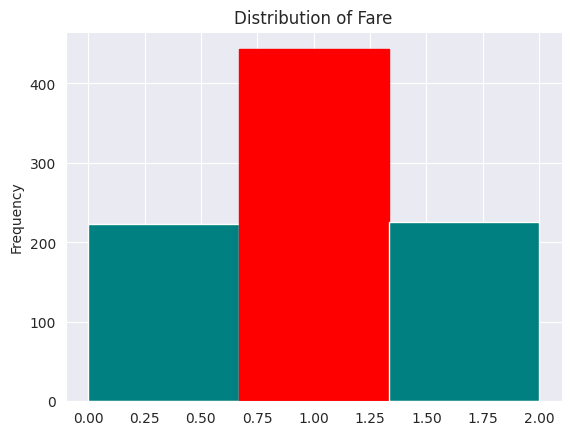

In [30]:
plt.title("Distribution of Fare")
s = titanic_data_update["Fare"]
p = s.plot(kind='hist', bins=3, color='teal')
p.patches[1].set_color('red')

### Split data to train and test set

In the beginning we have to split data to y and X

In [31]:
y_full = titanic_data_update["Survived"]
print(y_full)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [32]:
titanic_data_update.drop("Survived", inplace=True, axis=1)

In [33]:
titanic_data_update

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,3,male,22.000000,0,M,S,1
1,1,female,38.000000,2,C85,C,1
2,3,female,26.000000,1,M,S,0
3,1,female,35.000000,2,C123,S,1
4,3,male,35.000000,1,M,S,0
...,...,...,...,...,...,...,...
886,2,male,27.000000,1,M,S,0
887,1,female,19.000000,1,B42,S,0
888,3,female,29.699118,1,M,S,3
889,1,male,26.000000,1,C148,C,0


Now we encode and scaled our data, before splitting them for two sets.

In [34]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (OrdinalEncoder(), make_column_selector(dtype_include=object)),
    (StandardScaler(), make_column_selector(dtype_include=np.number))
)
pipe = Pipeline([
    ("ct", ct),
    ("scaler", StandardScaler())
])
X_ct = pipe.fit_transform(titanic_data_update)
X_ct

array([[ 7.37695132e-01,  4.49441367e-01,  5.85954143e-01, ...,
        -5.92480600e-01, -1.41343479e+00,  5.91598767e-02],
       [-1.35557354e+00, -1.37347318e+00, -1.94230320e+00, ...,
         6.38789012e-01,  1.40710361e+00,  5.91598767e-02],
       [-1.35557354e+00,  4.49441367e-01,  5.85954143e-01, ...,
        -2.84663197e-01, -3.16558743e-03, -5.60974830e-01],
       ...,
       [-1.35557354e+00,  4.49441367e-01,  5.85954143e-01, ...,
        -2.56279597e-16, -3.16558743e-03,  1.29942929e+00],
       [ 7.37695132e-01, -1.96241480e+00, -1.94230320e+00, ...,
        -2.84663197e-01, -3.16558743e-03, -5.60974830e-01],
       [ 7.37695132e-01,  4.49441367e-01, -6.78174528e-01, ...,
         1.77062908e-01, -1.41343479e+00, -5.60974830e-01]])

In [35]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_ct, y_full, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [36]:
print(f"Shape of train set: {len(X_train)} rows x {len(X_train[0, :])} columns")

Shape of train set: 501 rows x 7 columns


In [37]:
print(f"Shape of valid set: {len(X_valid)} rows x {len(X_valid[0, :])} columns")

Shape of valid set: 167 rows x 7 columns


In [38]:
print(f"Shape of test set: {len(X_test)} rows x {len(X_test[0, ])} columns")

Shape of test set: 223 rows x 7 columns


## Training and model selection

### Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
_ = log_reg.fit(X_train, y_train)

In [40]:
round(log_reg.score(X_valid, y_valid) * 100, 2)

82.04

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_valid)
confusion_matrix(y_valid, y_pred)

array([[93,  9],
       [21, 44]])

As we see in our prediction 44 samples were poorly predicted.

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear', 'newton-cg','lbfgs']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=5, refit=True)
_ = logreg_cv.fit(X_train,y_train)

In [43]:
logreg_cv.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [44]:
round(logreg_cv.best_score_ * 100, 2)

80.44

In [45]:
round(logreg_cv.best_estimator_.score(X_valid,y_valid) * 100, 2)

81.44

In [46]:
y_pred = logreg_cv.predict(X_valid)
confusion_matrix(y_valid, y_pred)

array([[92, 10],
       [21, 44]])

### Support Vector Machines

In [47]:
from sklearn.svm import SVC

svc = SVC()
_= svc.fit(X_train, y_train)

In [48]:
round(svc.score(X_valid, y_valid) * 100, 2)

83.23

In [49]:
y_pred = svc.predict(X_valid)
confusion_matrix(y_valid, y_pred)

array([[97,  5],
       [23, 42]])

In [50]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svc_clf=SVC()
svc_cv=GridSearchCV(svc_clf,param_grid,cv=5,refit=True)
_ = svc_cv.fit(X_train,y_train)

In [51]:
svc_cv.best_params_

{'C': 10, 'kernel': 'poly'}

In [52]:
round(svc_cv.best_score_ * 100, 2)

82.03

In [53]:
round(svc_cv.score(X_valid, y_valid) * 100, 2)

78.44

In [54]:
y_pred = svc_cv.predict(X_valid)
confusion_matrix(y_valid, y_pred)

array([[93,  9],
       [27, 38]])

### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

_ = rf_clf.fit(X_train, y_train)

In [56]:
round(rf_clf.score(X_valid, y_valid) * 100, 2)

79.64

In [57]:
y_pred = rf_clf.predict(X_valid)
confusion_matrix(y_valid, y_pred)

array([[92, 10],
       [24, 41]])

In [58]:
param_grid = {
    'n_estimators': [100, 200, 400, 600, 800, 1000],
    'max_depth': [50, 70, 90, 110, 130],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

rfclf=RandomForestClassifier()
rf_clf_cv=GridSearchCV(rfclf,param_grid,cv=5,refit=True)
_ = rf_clf_cv.fit(X_train,y_train)

In [59]:
rf_clf_cv.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 400,
 'random_state': 42}

In [60]:
round(rf_clf_cv.best_score_ * 100, 2)

83.23

In [61]:
round(rf_clf_cv.best_estimator_.score(X_valid, y_valid)* 100, 2)

83.23

In [62]:
y_pred = rf_clf_cv.predict(X_valid)
confusion_matrix(y_valid, y_pred)

array([[96,  6],
       [22, 43]])

### Adaboost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42, n_estimators=40)

_ = adb.fit(X_train, y_train)

In [64]:
round(adb.score(X_valid, y_valid) * 100, 2)

85.03

In [65]:
param_grid = {
    'n_estimators': [20, 30, 40, 50, 100, 200, 400, 500],
    'learning_rate': [0.01, 0.1, 1],
    'random_state': [42]
}

adb_clf = AdaBoostClassifier()
adb_clf_cv=GridSearchCV(adb_clf,param_grid,cv=5,refit=True)
_ = adb_clf_cv.fit(X_train,y_train)

In [66]:
adb_clf_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

In [67]:
round(adb_clf_cv.best_score_ * 100, 2)

81.43

In [68]:
round(adb_clf_cv.best_estimator_.score(X_valid, y_valid)* 100, 2)

82.04

### Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier(estimators=[
    ('svm', SVC()),
    ('adaclf', AdaBoostClassifier(random_state=42, n_estimators=40)),
    ('rfclf', RandomForestClassifier(random_state=42))
], voting='hard')

_ = vt.fit(X_train, y_train)

In [70]:
round(vt.score(X_valid, y_valid) * 100, 2)

82.63